In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df1 = pd.read_csv('../data/worldometer_coronavirus_daily_data.csv')

In [24]:
df.head()

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN
2,2020-2-17,Afghanistan,0.0,NaN,0.0,0.0,NaN
3,2020-2-18,Afghanistan,0.0,NaN,0.0,0.0,NaN
4,2020-2-19,Afghanistan,0.0,NaN,0.0,0.0,NaN


In [25]:
pivoted_df = df.pivot(index='date', columns='country',
                      values=['cumulative_total_cases'])

In [26]:
pivoted_df.index = pd.to_datetime(pivoted_df.index)

In [27]:
pivoted_df.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-03-06', '2021-03-07', '2021-03-08', '2021-03-09',
               '2021-03-10', '2021-03-11', '2021-03-12', '2021-03-13',
               '2021-03-14', '2021-03-15'],
              dtype='datetime64[ns]', name='date', length=419, freq=None)

In [28]:
# checking to make sure no dates are missing within the range of our index
pd.date_range(start = '2020-01-22', end = '2021-03-15' ).difference(pivoted_df.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [29]:
df['date'].max()

'2021-3-15'

In [30]:
pivoted_df.index = pd.date_range(start='2020-01-22', end=df['date'].max())

In [31]:
pivoted_df.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2021-03-06', '2021-03-07', '2021-03-08', '2021-03-09',
               '2021-03-10', '2021-03-11', '2021-03-12', '2021-03-13',
               '2021-03-14', '2021-03-15'],
              dtype='datetime64[ns]', length=419, freq='D')

In [32]:
pivoted_df.head()

cumulative_total_cases                                          \
country               Afghanistan Albania Algeria Andorra Angola Anguilla   
2020-01-22                    NaN     NaN     NaN     NaN    NaN      NaN   
2020-01-23                    NaN     NaN     NaN     NaN    NaN      NaN   
2020-01-24                    NaN     NaN     NaN     NaN    NaN      NaN   
2020-01-25                    NaN     NaN     NaN     NaN    NaN      NaN   
2020-01-26                    NaN     NaN     NaN     NaN    NaN      NaN   

                                                        ...          \
country    Antigua And Barbuda Argentina Armenia Aruba  ... Uruguay   
2020-01-22                 NaN       NaN     NaN   NaN  ...     NaN   
2020-01-23                 NaN       NaN     NaN   NaN  ...     NaN   
2020-01-24                 NaN       NaN     NaN   NaN  ...     NaN   
2020-01-25                 NaN       NaN     NaN   NaN  ...     NaN   
2020-01-26                 NaN       NaN     NaN   NaN  ...     NaN   

                                                                            \
country    Uzbekistan Vanuatu Venezuela Viet Nam Wallis And Futuna Islands   
2020-01-22        NaN     NaN       NaN      NaN                       NaN   
2020-01-23        NaN     NaN       NaN      NaN                       NaN   
2020-01-24        NaN     NaN       NaN      NaN                       NaN   
2020-01-25        NaN     NaN       NaN      NaN                       NaN   
2020-01-26        NaN     NaN       NaN      NaN                       NaN   

                                                 
country    Western Sahara Yemen Zambia Zimbabwe  
2020-01-22            NaN   NaN    NaN      NaN  
2020-01-23            NaN   NaN    NaN      NaN  
2020-01-24            NaN   NaN    NaN      NaN  
2020-01-25            NaN   NaN    NaN      NaN  
2020-01-26            NaN   NaN    NaN      NaN  

[5 rows x 219 columns]

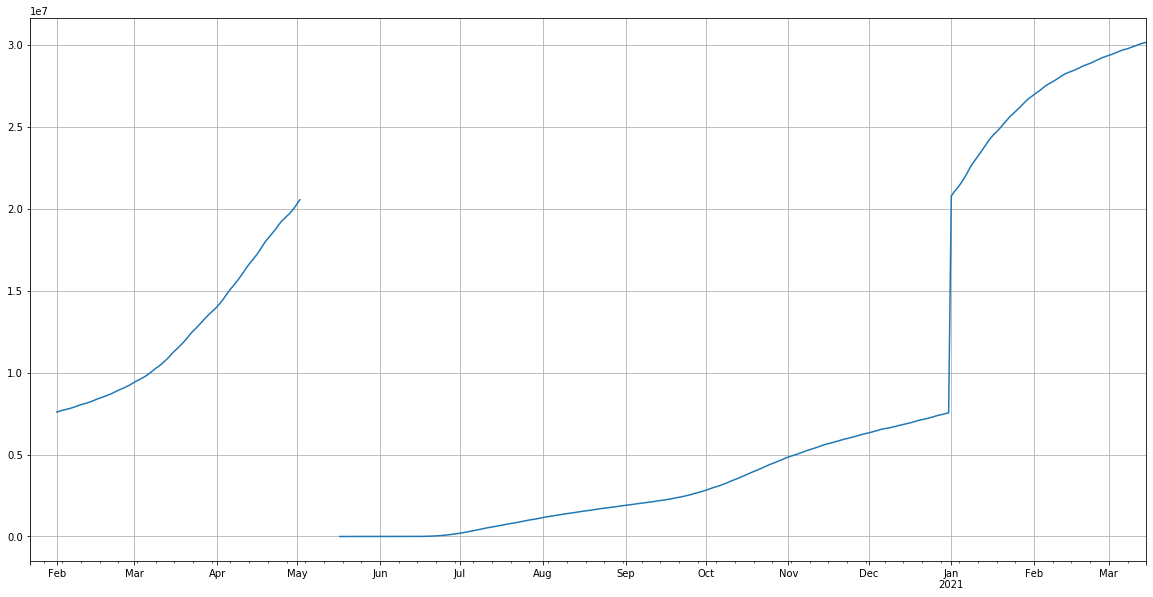

In [34]:
target = ('cumulative_total_cases', 'USA')
pivoted_df[target].plot(legend=False, figsize=(20,10),grid=True)

In [49]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d', infer_datetime_format=True)

In [35]:
pivoted_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 419 entries, 2020-01-22 to 2021-03-15
Freq: D
Columns: 219 entries, (cumulative_total_cases, Afghanistan) to (cumulative_total_cases, Zimbabwe)
dtypes: float64(219)
memory usage: 720.2 KB


In [54]:
df['date']

count                   86529
unique                    419
top       2020-10-28 00:00:00
freq                      219
first     2020-01-22 00:00:00
last      2021-03-15 00:00:00
Name: date, dtype: object

In [55]:
df.set_index('date', inplace=True)

In [56]:
df.index

DatetimeIndex(['2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24',
               ...
               '2021-03-06', '2021-03-07', '2021-03-08', '2021-03-09',
               '2021-03-10', '2021-03-11', '2021-03-12', '2021-03-13',
               '2021-03-14', '2021-03-15'],
              dtype='datetime64[ns]', name='date', length=86529, freq=None)

In [59]:
df.index.freq = 'd'

ValueError: Inferred frequency None from passed values does not conform to passed frequency D